**Task1 Credit Scoring Model**



*Description*

Develop a credit scoring model to predict the
creditworthiness of individuals based on historical
financial train_data. Utilize classification algorithms and
assess the model's accuracy.

1- Importing train_data set which is german credit dataset


In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,  PolynomialFeatures  
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier



In [2]:
train_data=pd.read_csv("../train.csv")
test_data=pd.read_csv("../test.csv")

C:\Users\AYA\AppData\Local\Temp\ipykernel_1508\3868841713.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data=pd.read_csv("../train.csv")


In [3]:
train_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
train_data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

**Pre processing**


In [5]:
train_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
#Dropping null values
train_data.dropna(inplace=True)

In [7]:
train_data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Find The outliers within the train_data

In [8]:

numericData = train_data.select_dtypes(include='number').columns

# Get the interquartile range by getting Q1 and Q3
Q1 = train_data[numericData].quantile(0.25)
Q3 = train_data[numericData].quantile(0.75)

IQR = Q3 - Q1

# Get whiskers to calculate the outliers
minimum = Q1 - (1.5 * IQR)
maximum = Q3 + (1.5 * IQR)



outliers = train_data[(train_data[numericData] < minimum) | (train_data[numericData] > maximum)]

print("The outliers are ")
print(outliers)

The outliers are 
        ID Customer_ID Month Name  Age  SSN Occupation Annual_Income  \
0      NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
6      NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
8      NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
9      NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
10     NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
...    ...         ...   ...  ...  ...  ...        ...           ...   
99994  NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
99995  NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
99996  NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
99997  NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
99999  NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   

       Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0                        NaN                NaN  

In [9]:
outliers.count()

ID                             0
Customer_ID                    0
Month                          0
Name                           0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       1299
Num_Bank_Accounts            670
Num_Credit_Card             1220
Interest_Rate               1136
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date         1733
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries         864
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       1
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month         3509
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

Fill the outliers train_data with Mean value of Numeric train_data

In [10]:

# Calculate the mean of each column
meanValue = train_data[numericData].mean()

# Convert outliers DataFrame to boolean
outliers_bool = outliers.notnull()

# Fill outliers with the mean
train_data[numericData] = train_data[numericData].mask(outliers_bool, meanValue, axis=0)

# Print the modified DataFrame
print(train_data)
print(meanValue)


            ID Customer_ID     Month             Name  Age          SSN  \
0       0x1602   CUS_0xd40   January    Aaron Maashoh   23  821-00-0265   
6       0x1608   CUS_0xd40      July    Aaron Maashoh   23  821-00-0265   
8       0x160e  CUS_0x21b1   January  Rick Rothackerj  28_  004-07-5839   
9       0x160f  CUS_0x21b1  February  Rick Rothackerj   28  004-07-5839   
10      0x1610  CUS_0x21b1     March  Rick Rothackerj   28  004-07-5839   
...        ...         ...       ...              ...  ...          ...   
99994  0x25fe8  CUS_0x942c     March            Nicks   25  078-73-5990   
99995  0x25fe9  CUS_0x942c     April            Nicks   25  078-73-5990   
99996  0x25fea  CUS_0x942c       May            Nicks   25  078-73-5990   
99997  0x25feb  CUS_0x942c      June            Nicks   25  078-73-5990   
99999  0x25fed  CUS_0x942c    August            Nicks   25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist  

**Visualization**

Pie Chart

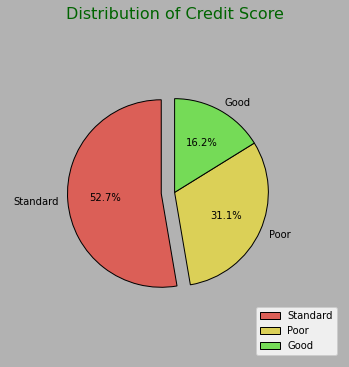

In [11]:
# Function to detail columns



# Plotting the data

fig, ax = plt.subplots(figsize=(6, 8))
fig.set_facecolor('#b2b2b2')
credit_score_names = ['Standard', 'Poor', 'Good']

ax.pie(
    train_data['Credit_Score'].value_counts(),
    labels=credit_score_names,
    radius=0.7,
    startangle=90,
    explode=(0.1, 0, 0),
    autopct='%1.1f%%',
    colors=sns.color_palette('hls', 7),
    wedgeprops={'edgecolor': 'k'}
)

# Customize the plot

plt.title('Distribution of Credit Score', color='darkgreen', fontsize=16)
plt.legend(loc='lower right', labels=credit_score_names, fontsize=10)


Histogram

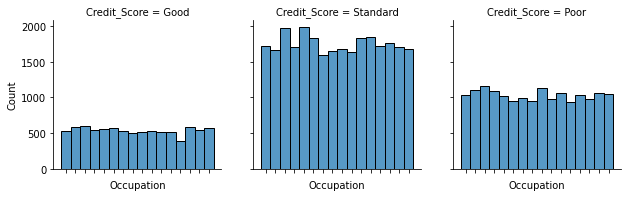

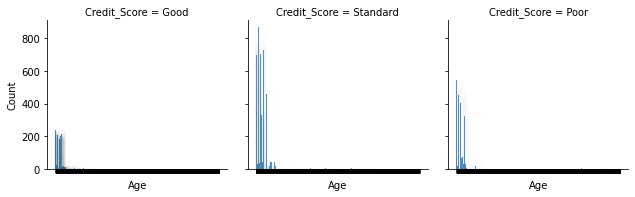

In [12]:
figure1 = sns.FacetGrid(train_data, col='Credit_Score', height=3, aspect=1)
figure1.map(sns.histplot, 'Occupation')
figure1.set(xticklabels=[])

figure2 = sns.FacetGrid(train_data, col='Credit_Score', height=3, aspect=1)
figure2.map(sns.histplot, 'Age')
figure2.set(xticklabels=[])

# Show the plots

plt.show()


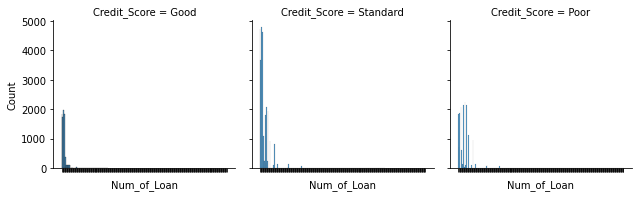

In [13]:
figure4 = sns.FacetGrid(train_data, col='Credit_Score')
figure4.map(sns.histplot, 'Num_of_Loan')
figure4.set(xticklabels=[])

Stripplot

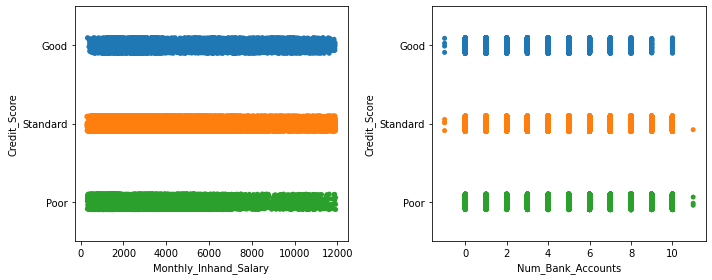

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plotting the data for the variables

sns.stripplot(
    data=train_data,
    x='Monthly_Inhand_Salary',
    y='Credit_Score',
    hue="Credit_Score",
    legend=False,
    ax=axes[0]
)

sns.stripplot(
    data=train_data,
    x='Num_Bank_Accounts',
    y='Credit_Score',
    hue="Credit_Score",
    legend=False,
    ax=axes[1]
)

plt.tight_layout()


plt.show()

Count Plot

In [15]:
# train_data['Annual_Income'] = pd.to_numeric(train_data['Annual_Income'], errors='coerce')
# columns = {  0: 'Annual_Income'}
# fig, ax = plt.subplots(1,3, figsize=(20, 5))

# for key, val in columns.items(): 
#     sns.countplot(x=val,  train_data=train_data, ax=ax[key], order = train_data[val].value_counts().index)
#     plt.xticks(rotation=45)

Barplot

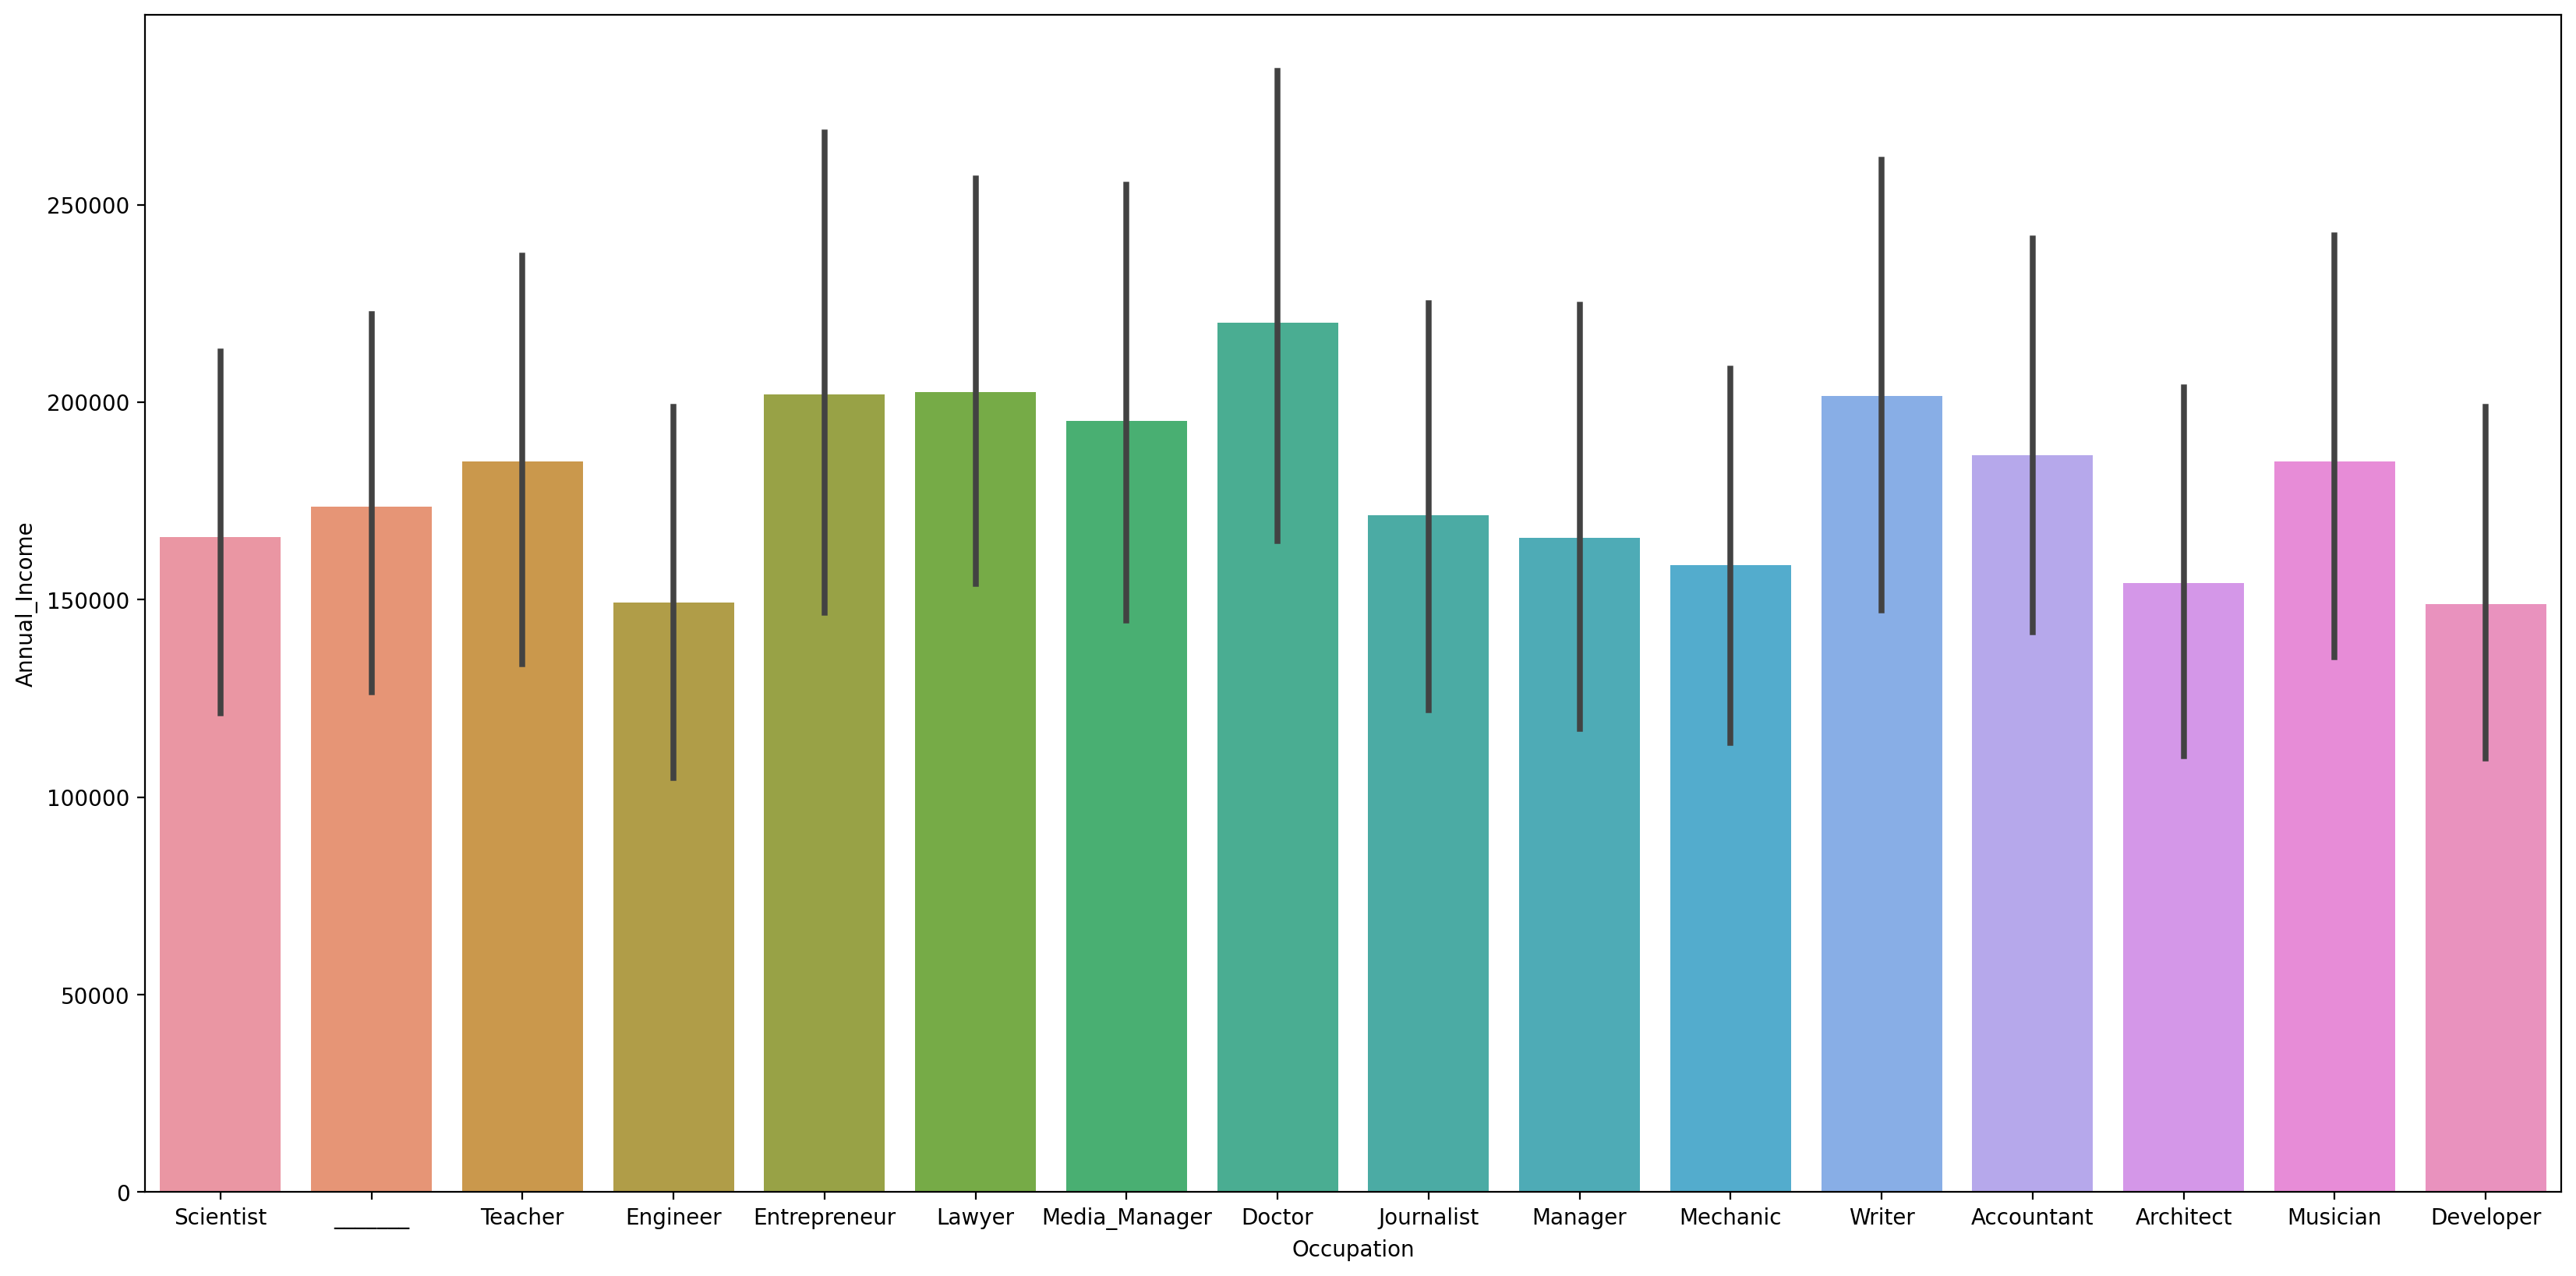

In [16]:

train_data['Annual_Income'] = pd.to_numeric(train_data['Annual_Income'], errors='coerce')
plt.figure(figsize=(20,10), dpi=200)
sns.barplot(data=train_data, x='Occupation', y= 'Annual_Income')
plt.show()

Histogram

In [17]:

# sns.histplot(data=train_data, x ='Credit_Score',y='Amount_invested_monthly', binwidth=5)
# plt.title("Credit Score of amount of money invested Monthly")

Box Plot

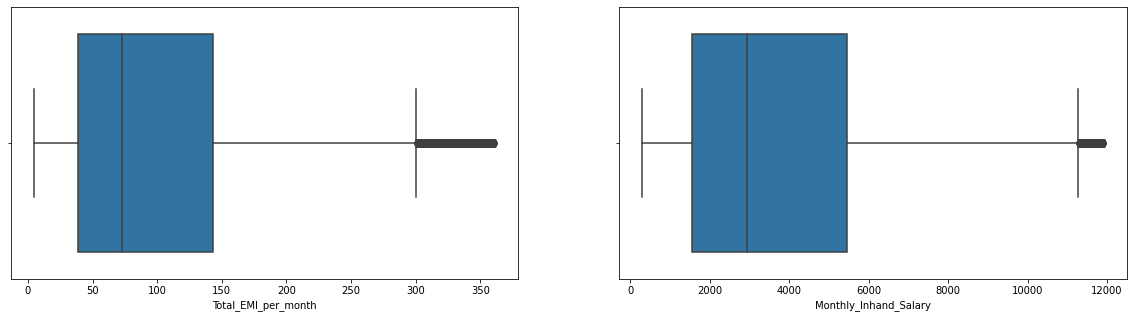

In [18]:
columns = {0:'Total_EMI_per_month' ,  1: 'Monthly_Inhand_Salary'}
fig, ax = plt.subplots(1,len(columns), figsize=(20, 5))
for key, val in columns.items(): 
    sns.boxplot(x=train_data[val], ax= ax[key])

In [19]:

# # Create a boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Type_of_Loan', y='Monthly_Inhand_Salary', data=train_data, hue='Type_of_Loan')
# plt.title('Monthly salary Distribution for different types of loan')
# plt.show()

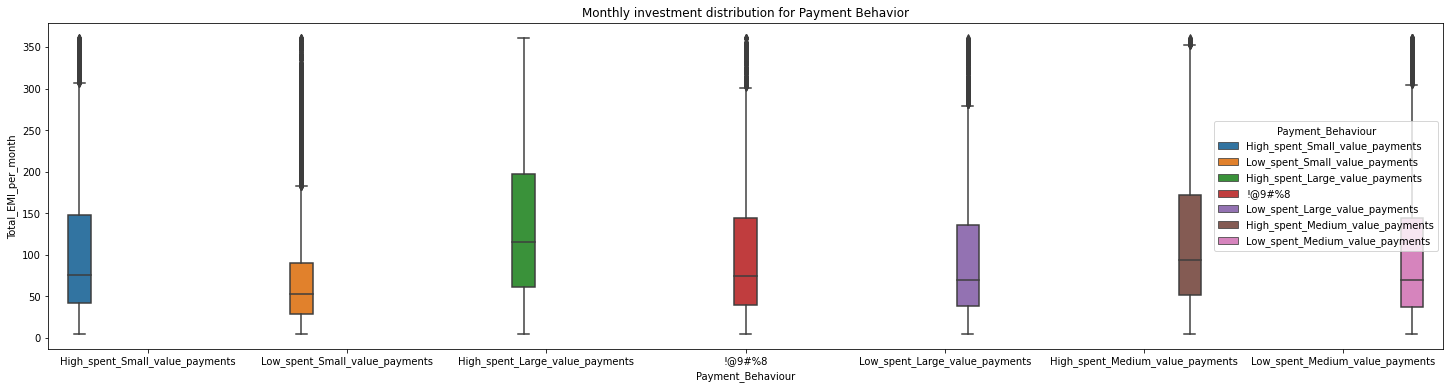

In [20]:
plt.figure(figsize=(25, 6))
sns.boxplot(x='Payment_Behaviour', y='Total_EMI_per_month', data=train_data, hue='Payment_Behaviour')
plt.title('Monthly investment distribution for Payment Behavior')
plt.show()

**Correlation heatmap**

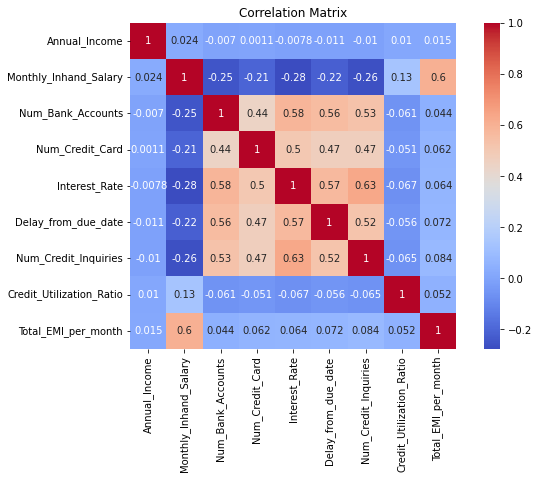

In [21]:
# check for correlation among the features

corr = train_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Encode Categorical to numeric

In [23]:
# label_encoder = LabelEncoder()
# train_data['Age'] = label_encoder.fit_transform(train_data['Age'])
# train_data['Age']=train_data['Age'].astype(int)
train_data['Age'] = train_data['Age'].astype(str)  # Convert Age column to string type
train_data['Age'] = train_data['Age'].str.replace('_', '')  # Remove '_' from the Age column
train_data['Age'] = pd.to_numeric(train_data['Age'], errors='coerce')  # Convert to numeric, converting invalid parsing to NaN
train_data['Age'] = train_data['Age'].fillna(0).astype(int)  # Fill NaN values with 0 and convert to int


# train_data['Monthly_Balance'] = label_encoder.fit_transform(train_data['Monthly_Balance'])
# Convert Monthly_Balance column to string
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].astype(str)

# Remove '_' from the Monthly_Balance column
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].str.replace('_', '')

# Convert to numeric, converting invalid parsing to NaN
train_data['Monthly_Balance'] = pd.to_numeric(train_data['Monthly_Balance'], errors='coerce')

# Fill NaN

train_data['Annual_Income'] =train_data['Annual_Income'] .astype(float)
# Remove non-numeric characters from the Num_of_Loan column
# Convert Num_of_Loan to string
train_data['Num_of_Loan'] = train_data['Num_of_Loan'].astype(str)

# Remove non-numeric characters from the Num_of_Loan column
train_data['Num_of_Loan'] = train_data['Num_of_Loan'].str.replace(r'\D', '', regex=True)

# Convert Num_of_Loan to numeric, converting invalid parsing to NaN
train_data['Num_of_Loan'] = pd.to_numeric(train_data['Num_of_Loan'], errors='coerce')

# Fill NaN values with 0 and

# train_data['Annual_Income'] = label_encoder.fit_transform(train_data['Annual_Income'])
# train_data['Num_of_Loan'] = label_encoder.fit_transform(train_data['Num_of_Loan'])
# Replace '_' with an empty string in the Changed_Credit_Limit column
# Replace empty string with NaN
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].replace('', np.nan)

# Convert the column to string
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].astype(str)

# Remove underscores from the Changed_Credit_Limit column
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].str.replace('_', '')
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].replace('', np.nan)
# Convert the column to float
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].astype(float)





# Convert the column to string type
train_data['Outstanding_Debt'] = train_data['Outstanding_Debt'].astype(str)

# Remove the underscore from the Outstanding_Debt column
train_data['Outstanding_Debt'] = train_data['Outstanding_Debt'].str.replace('_', '')

# Convert the column to float
train_data['Outstanding_Debt'] = train_data['Outstanding_Debt'].astype(float)

# train_data['Changed_Credit_Limit'] = label_encoder.fit_transform(train_data['Changed_Credit_Limit'])
# train_data['Outstanding_Debt'] = label_encoder.fit_transform(train_data['Outstanding_Debt'])
# Remove non-numeric characters from the Num_of_Delayed_Payment column
train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].replace(r'\D', '', regex=True)

# Convert the column to integer
train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].astype(int)

# train_data['Num_of_Delayed_Payment'] = label_encoder.fit_transform(train_data['Num_of_Delayed_Payment'])

# train_data['Amount_invested_monthly'] = label_encoder.fit_transform(train_data['Amount_invested_monthly'])
train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].str.replace('_', '')

# Convert the column to float
train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].astype(float)

In [24]:
print (train_data)

            ID Customer_ID     Month             Name  Age          SSN  \
0       0x1602   CUS_0xd40   January    Aaron Maashoh   23  821-00-0265   
6       0x1608   CUS_0xd40      July    Aaron Maashoh   23  821-00-0265   
8       0x160e  CUS_0x21b1   January  Rick Rothackerj   28  004-07-5839   
9       0x160f  CUS_0x21b1  February  Rick Rothackerj   28  004-07-5839   
10      0x1610  CUS_0x21b1     March  Rick Rothackerj   28  004-07-5839   
...        ...         ...       ...              ...  ...          ...   
99994  0x25fe8  CUS_0x942c     March            Nicks   25  078-73-5990   
99995  0x25fe9  CUS_0x942c     April            Nicks   25  078-73-5990   
99996  0x25fea  CUS_0x942c       May            Nicks   25  078-73-5990   
99997  0x25feb  CUS_0x942c      June            Nicks   25  078-73-5990   
99999  0x25fed  CUS_0x942c    August            Nicks   25  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist      

In [25]:
train_data.dropna()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
12,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,0x25fdf,CUS_0x8600,June,Sarah McBridec,28,031-35-0942,_______,20002.88,1929.906667,10.0,...,Bad,3571.70,33.359987,6 Years and 1 Months,Yes,60.964772,74.366603,!@9#%8,307.659291,Standard
99991,0x25fe1,CUS_0x8600,August,Sarah McBridec,29,031-35-0942,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,37.140784,6 Years and 3 Months,Yes,60.964772,34.662906,High_spent_Large_value_payments,337.362988,Standard
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor


In [26]:
def model_performance(y_test,y_pred, method):
    
    # calculate the accruacy of the model
    print("Accuracy score of the model", accuracy_score(y_test,y_pred))
    print("Classification report \n")
    
    #generate the classification report
    print(classification_report(y_test,y_pred))
    
    #generate the confusion matrix
    fig = plt.figure(figsize = (4,4))
    ax = fig.gca()
    cnf_matrix_log = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix: '+  method + '\n', y=1.1)

**1- Random Forest**


In [29]:

model_rf = RandomForestClassifier(n_estimators=500 , n_jobs = -1,random_state =50,max_leaf_nodes = 30, criterion = 'entropy',min_samples_leaf=2)
# fitting the model

x_train=train_data.iloc[:,:-1]
y_train=train_data['Credit_Score']
x_test=test_data.iloc[:,:-1]

# Now, you can use X_train_imputed and X_test_imputed in your RandomForestClassifier
model_rf.fit(x_train, y_train)


# make predictions
prediction_test = model_rf.predict(x_test)


ValueError: could not convert string to float: '0x1602'

Accuracy score of the model 0.38095238095238093
Classification report 

                     precision    recall  f1-score   support

           business       0.00      0.00      0.00        11
                car       0.36      0.57      0.44        35
domestic appliances       0.00      0.00      0.00         1
          education       0.00      0.00      0.00         6
furniture/equipment       0.47      0.43      0.45        21
           radio/TV       0.39      0.42      0.41        26
            repairs       0.00      0.00      0.00         3
    vacation/others       0.00      0.00      0.00         2

           accuracy                           0.38       105
          macro avg       0.15      0.18      0.16       105
       weighted avg       0.31      0.38      0.34       105



c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

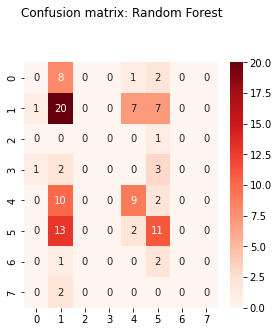

In [ ]:
model_performance(y_test,prediction_test, 'Random Forest')

2- Logistic Regression

c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: Undefi

Accuracy score of the model 0.2857142857142857
Classification report 

                     precision    recall  f1-score   support

           business       0.00      0.00      0.00        11
                car       0.31      0.80      0.45        35
domestic appliances       0.00      0.00      0.00         1
          education       0.00      0.00      0.00         6
furniture/equipment       0.00      0.00      0.00        21
           radio/TV       0.15      0.08      0.10        26
            repairs       0.00      0.00      0.00         3
    vacation/others       0.00      0.00      0.00         2

           accuracy                           0.29       105
          macro avg       0.06      0.11      0.07       105
       weighted avg       0.14      0.29      0.18       105



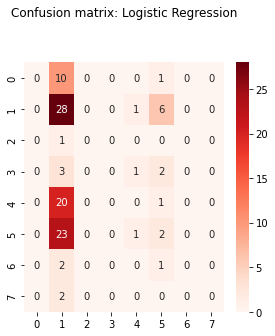

In [ ]:
model = LogisticRegression()
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)
model_performance(y_test,y_pred,"Logistic Regression")

3- KNN

In [ ]:
knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],  # Example values, you can choose others
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 is manhattan_distance and 2 is euclidean_distance
}

In [ ]:
grid_search = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train_imputed, y_train)

print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'n_neighbors': 19, 'p': 1, 'weights': 'distance'}


In [ ]:
best_knn = grid_search.best_estimator_

y_pred2 = best_knn.predict(X_test_imputed)

Accuracy score of the model 0.38095238095238093
Classification report 

                     precision    recall  f1-score   support

           business       0.00      0.00      0.00        11
                car       0.42      0.69      0.52        35
domestic appliances       0.00      0.00      0.00         1
          education       0.00      0.00      0.00         6
furniture/equipment       0.43      0.29      0.34        21
           radio/TV       0.36      0.38      0.37        26
            repairs       0.00      0.00      0.00         3
    vacation/others       0.00      0.00      0.00         2

           accuracy                           0.38       105
          macro avg       0.15      0.17      0.15       105
       weighted avg       0.31      0.38      0.33       105



c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

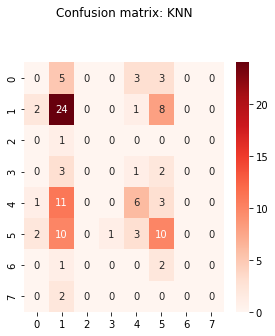

In [ ]:
model_performance(y_test,y_pred2,"KNN")

4- Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
}

In [ ]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train_imputed, y_train)

print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'sgd'}


Accuracy score of the model 0.27586206896551724
Classification report 

                     precision    recall  f1-score   support

           business       0.00      0.00      0.00         7
                car       0.28      1.00      0.43        16
domestic appliances       0.00      0.00      0.00         1
          education       0.00      0.00      0.00         1
furniture/equipment       0.00      0.00      0.00        16
           radio/TV       0.00      0.00      0.00        16
    vacation/others       0.00      0.00      0.00         1

           accuracy                           0.28        58
          macro avg       0.04      0.14      0.06        58
       weighted avg       0.08      0.28      0.12        58



c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

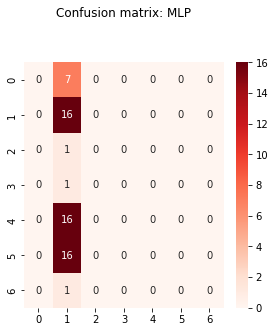

In [ ]:
final_mlp = MLPClassifier(max_iter=100, **clf.best_params_)

# Drop rows with missing values from the training and test sets
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train.index.intersection(X_train_dropped.index)]

X_test_dropped = X_test.dropna()
y_test_dropped = y_test[X_test.index.intersection(X_test_dropped.index)]

# Now, you can use X_train_dropped, y_train_dropped, X_test_dropped, and y_test_dropped 
final_mlp.fit(X_train_dropped, y_train_dropped)
y_pred4= final_mlp.predict(X_test_dropped)
model_performance(y_test_dropped, y_pred4, "MLP")